In [1]:
#visual analysis of churn dataset

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 30) #maximum of columns to show
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
df = pd.read_csv("telecom_churn.csv")

In [4]:
df.head(3)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
#eliminamos phone number
df.drop(["phone number"], axis = 1, inplace = True)

In [7]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [8]:
#what is the churn/no churn proportion
df["churn"].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [9]:
#dataset is inbalanced, with 85,5% of clients not churned

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B196A20>]],
      dtype=object)

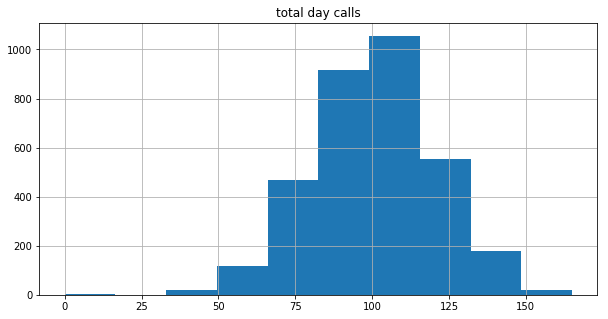

In [10]:
#unvariate numerical features features analysis: we explore the distribution of each variable using histograms
df.hist(["total day calls"], figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B4F3780>,
      dtype=object)

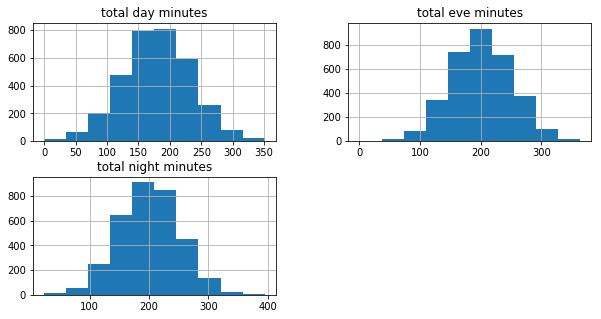

In [11]:
#lets plot several variables
varias = ["total day minutes", "total eve minutes", "total night minutes"]
df[varias].hist(figsize = (10,5))

In [12]:
#todas distribuidas normalmente

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B648FD0>,
      dtype=object)

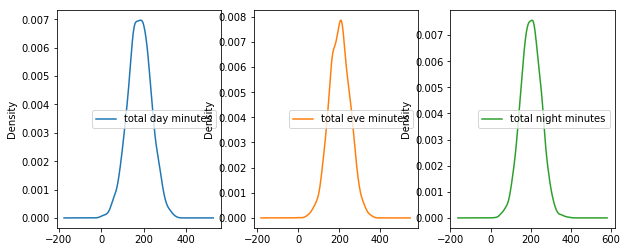

In [13]:
#Otra forma: density plots
df[varias].plot(kind = "density", subplots = True, layout = (1,3), sharex = False, figsize = (10,4))

In [14]:
#Boxplot: para univariate te entrega una descripcion completa de medidas de dispersion y tendencia central

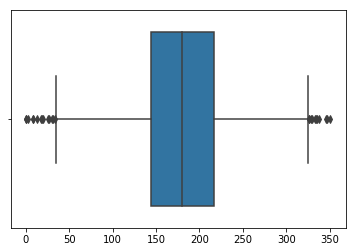

In [15]:
sns.boxplot(["total day minutes"], data = df)

In [16]:
df["total day minutes"].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64

In [17]:
df["total day minutes"].median()

179.4

In [18]:
df.shape

(3333, 20)

In [19]:
#analysis of categorical and binary features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64


In [20]:
#we have: state, voice, intl, customer service calls y churn

In [21]:
#for categorical variables we use the bar plot. bar representa graficamente una tabla de frcuencias. Se usa countplot()



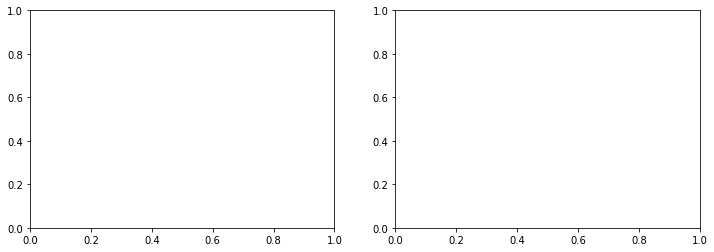

In [22]:
#lets plot the distribution of 2 categorical variables: churn and customer service calls
#se crea el canvas
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

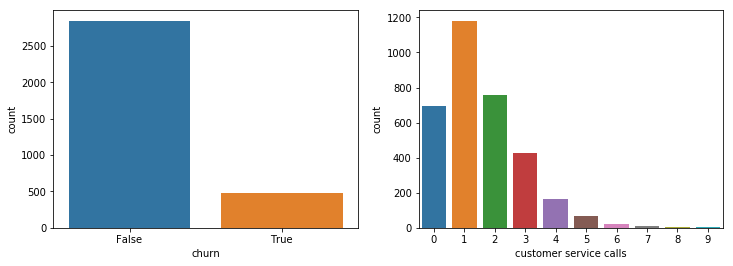

In [23]:
#luego:
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
sns.countplot(x = "churn", data = df, ax = axes[0])
sns.countplot(x = "customer service calls", data = df, ax = axes[1])

In [24]:
#MULTIVARIATE VISUALIZATION
#quantitative vs quantitative: correlation
#trabajamos aca solo con las variables numericas del dataset. usamos el metodo corr()


In [25]:
#primero creamos una lista con las columnas de data numerica
numerical = list(set(df.columns) - set(["state", 'international plan', 'voice mail plan', 'area code', 'churn', 'customer service calls']))

In [26]:
numerical

['total intl charge',
 'total night calls',
 'total eve calls',
 'total night charge',
 'total day charge',
 'account length',
 'number vmail messages',
 'total eve minutes',
 'total night minutes',
 'total intl minutes',
 'total intl calls',
 'total day minutes',
 'total day calls',
 'total eve charge']

In [27]:
len(numerical)

14

In [28]:
#creamos una matriz de correlacion entre stas variables
corr_matrix = df[numerical].corr()

In [29]:
corr_matrix

total intl charge  total night calls  total eve calls  \
total intl charge               1.000000          -0.013630         0.008674   
total night calls              -0.013630           1.000000         0.007710   
total eve calls                 0.008674           0.007710         1.000000   
total night charge             -0.015186           0.011188        -0.002056   
total day charge               -0.010094           0.022972         0.015769   
account length                  0.009546          -0.013176         0.019260   
number vmail messages           0.002884           0.007123        -0.005864   
total eve minutes              -0.011067           0.007586        -0.011430   
total night minutes            -0.015180           0.011204        -0.002093   
total intl minutes              0.999993          -0.013605         0.008703   
total intl calls                0.032372           0.000305         0.017434   
total day minutes              -0.010092           0.022972         0.015769   
total day calls                 0.021666          -0.019557         0.006462   
total eve charge               -0.011074           0.007596        -0.011423   

                       total night charge  total day charge  account length  \
total intl charge               -0.015186         -0.010094        0.009546   
total night calls                0.011188          0.022972       -0.013176   
total eve calls                 -0.002056          0.015769        0.019260   
total night charge               1.000000          0.004301       -0.008960   
total day charge                 0.004301          1.000000        0.006214   
account length                  -0.008960          0.006214        1.000000   
number vmail messages            0.007663          0.000776       -0.004628   
total eve minutes               -0.012593          0.007050       -0.006757   
total night minutes              0.999999          0.004324       -0.008955   
total intl minutes              -0.015214         -0.010157        0.009514   
total intl calls                -0.012329          0.008032        0.020661   
total day minutes                0.004300          1.000000        0.006216   
total day calls                  0.022927          0.006753        0.038470   
total eve charge                -0.012601          0.007036       -0.006745   

                       number vmail messages  total eve minutes  \
total intl charge                   0.002884          -0.011067   
total night calls                   0.007123           0.007586   
total eve calls                    -0.005864          -0.011430   
total night charge                  0.007663          -0.012593   
total day charge                    0.000776           0.007050   
account length                     -0.004628          -0.006757   
number vmail messages               1.000000           0.017562   
total eve minutes                   0.017562           1.000000   
total night minutes                 0.007681          -0.012584   
total intl minutes                  0.002856          -0.011035   
total intl calls                    0.013957           0.002541   
total day minutes                   0.000778           0.007043   
total day calls                    -0.009548          -0.021451   
total eve charge                    0.017578           1.000000   

                       total night minutes  total intl minutes  \
total intl charge                -0.015180            0.999993   
total night calls                 0.011204           -0.013605   
total eve calls                  -0.002093            0.008703   
total night charge                0.999999           -0.015214   
total day charge                  0.004324           -0.010157   
account length                   -0.008955            0.009514   
number vmail messages             0.007681            0.002856   
total eve minutes                -0.012584           -0.011035   
total night minutes               1.

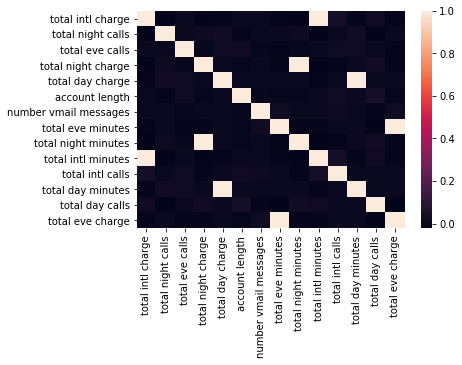

In [30]:
#graficamos un heatmap
sns.heatmap(corr_matrix)

In [31]:
#dado que los total charges dependen del nro de minutos, no contribuyen al analisis. Se sacan:

In [32]:
numerical = list(set(numerical) - set(["total day charge", "total eve charge", "total night charge", "total intl charge"]))

In [33]:
len(numerical)

10

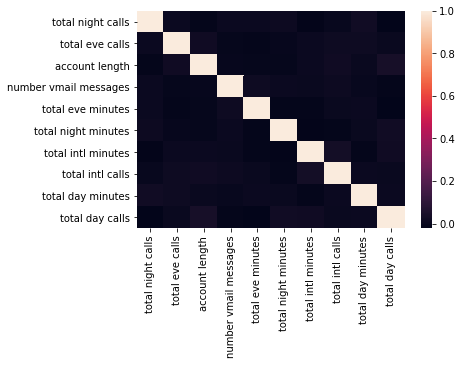

In [34]:
#ahora de nuevo
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [35]:
#scatter plots: sirven para graficar dos variables y analizar su correlacion. Usamos metodo scatter de matplotlib
#syntax. plt.scatter(var1, var2)

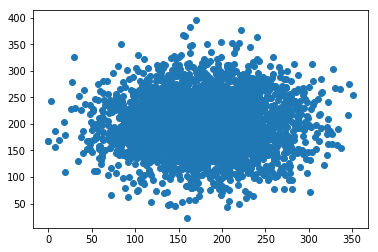

In [36]:
plt.scatter(df["total day minutes"], df["total night minutes"])

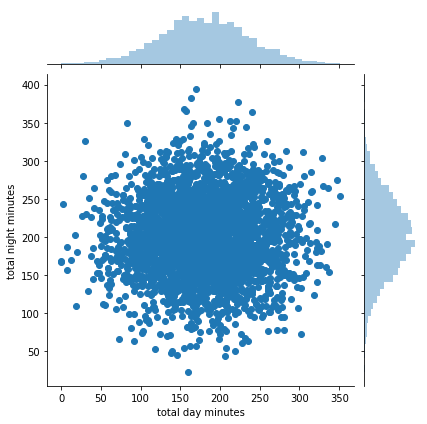

In [37]:
#otra forma de visualizar con scatter:
sns.jointplot(x = "total day minutes", y = "total night minutes", data = df, kind = "scatter")

In [38]:
#p >> 0.05 implica que no hay significacion estadistica

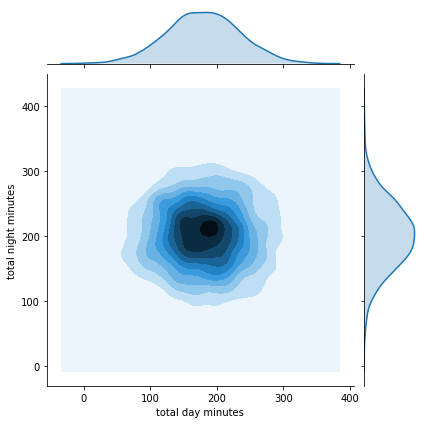

In [39]:
#tambien podemos hacer una version smoothed usando kde
sns.jointplot(x = "total day minutes", y = "total night minutes", data = df, kind = "kde")

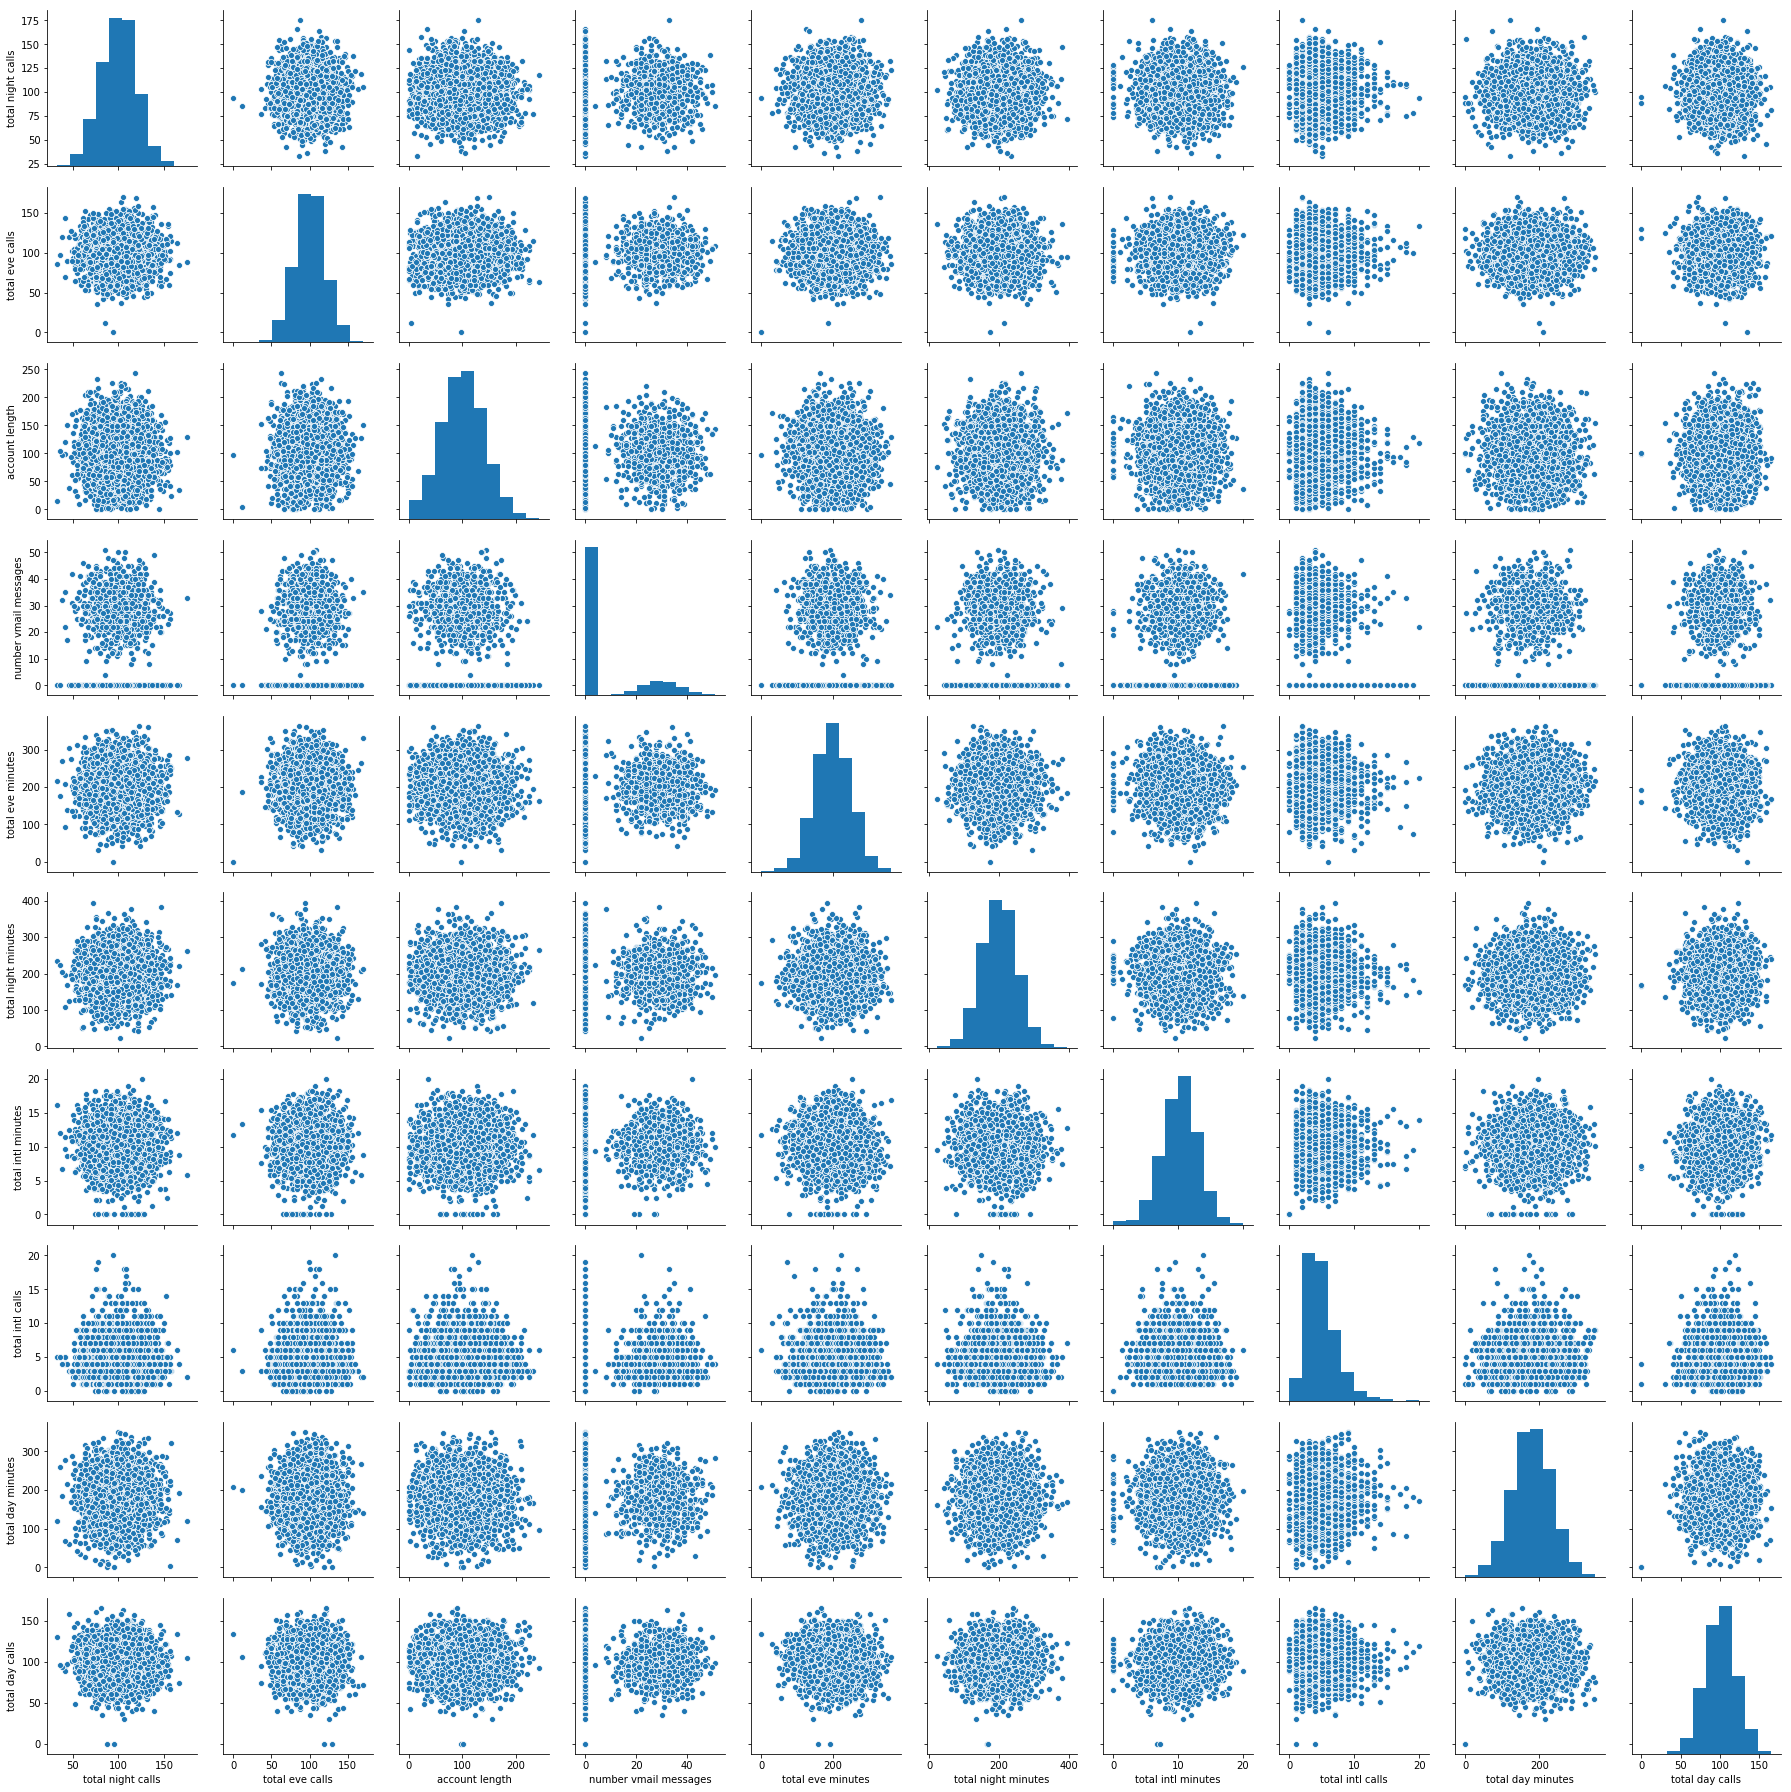

In [40]:
#scatterplot matrix: usamos pairplot
sns.pairplot(df[numerical])

In [41]:
#no se aprecia mayores correlaciones entre las variables numericas

In [42]:
#analisis de quantitative vs categorical

In [43]:
#veamos como se relacionan las variables numericas con churn

In [44]:
#analicemos churn versus llamadas de dia y noche. Usamos lmplot

In [45]:
# syntax: sns.lmplot(var1, var2, data, hue (variable categorica), fit_reg = False)


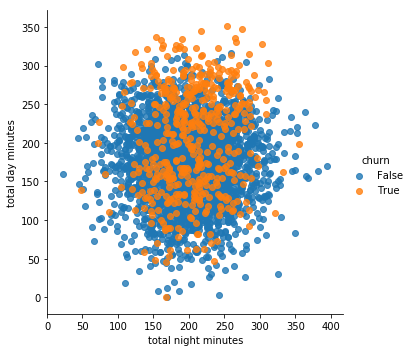

In [46]:
sns.lmplot("total night minutes", "total day minutes", data = df,hue = "churn",  fit_reg = False)

In [47]:
#vemos que los churn tienden a hablar harto tanto de dia como de noche (amarillos movidos hacia derecha y arriba)

In [48]:
numerical = list(set(numerical) - set(["customer service calls"]))



In [49]:
numerical

['total night calls',
 'total eve calls',
 'account length',
 'number vmail messages',
 'total eve minutes',
 'total night minutes',
 'total intl minutes',
 'total intl calls',
 'total day minutes',
 'total day calls']

In [50]:
#ahora creamos boxplots para hacer una stat description de las variables de los grupos churn y no -churn

In [51]:
#agregamos customer service calls a numericals
numerical.append("customer service calls")

In [52]:
#creamos el plot

In [53]:
len(numerical)

11

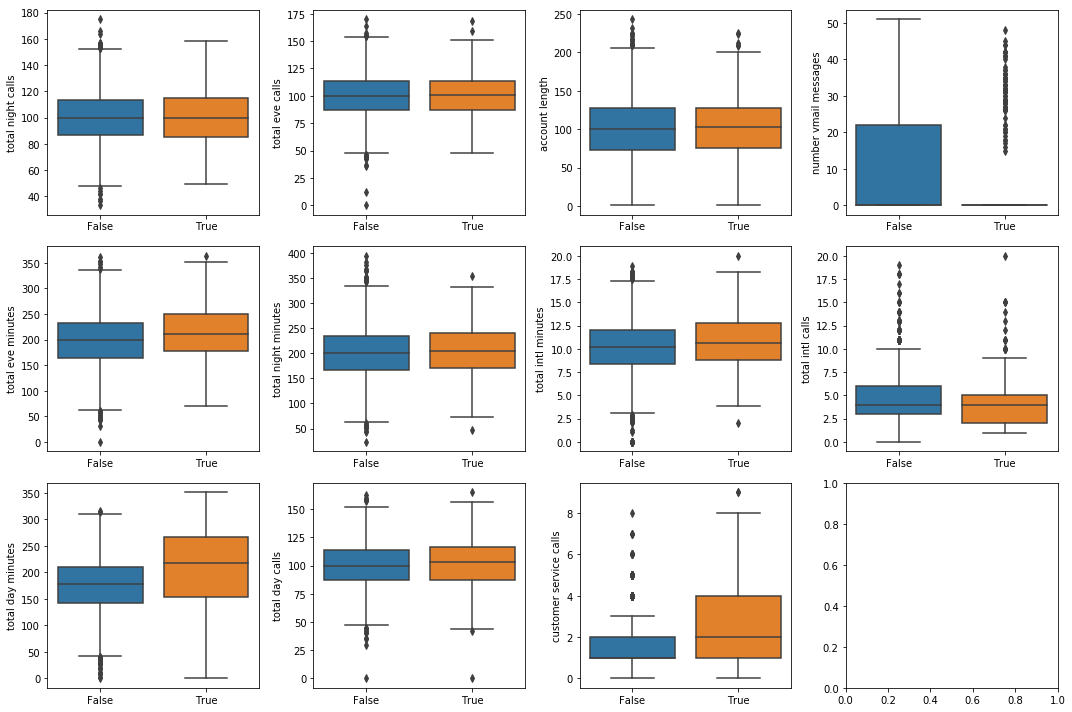

In [54]:
#son 11 variables: el canvas seria de 3x4
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (15,10))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x = "churn", y = feat, data = df, ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()



In [55]:
#TRES PRINCIPALES VARIABLES ACA: total day minutes, customer service calls and voice mail plan
    

In [56]:
#miremos mas de cerca el total day minutes y agreguemos un grafico de violin

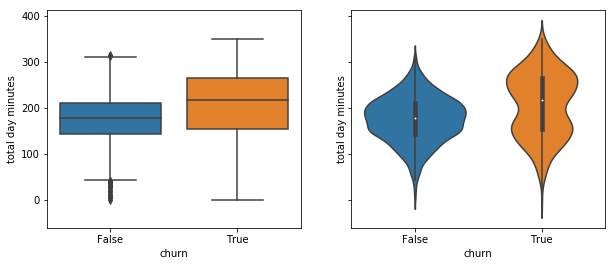

In [57]:
_, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (10,4))
sns.boxplot(x = "churn", y = "total day minutes", data = df, ax = axes[0])
sns.violinplot(x = "churn", y = "total day minutes", data = df, ax = axes[1])

In [58]:
#disloyal costumers tend to talk more on the phone

In [59]:
#SE PUEDE USAR UNA HERRAMIENTA DE SEABORN LLAMADA CATPLOT PARA PLOTEAR BARPLOTS COMPARANDO CHURN CON DOS CATEGORUIAS AL MISMO TIEMPO.
#ejemplo: churn por total day minutes y customer service calls. Es decir: como se comportan los churn/no churns con 0..8 llamadas

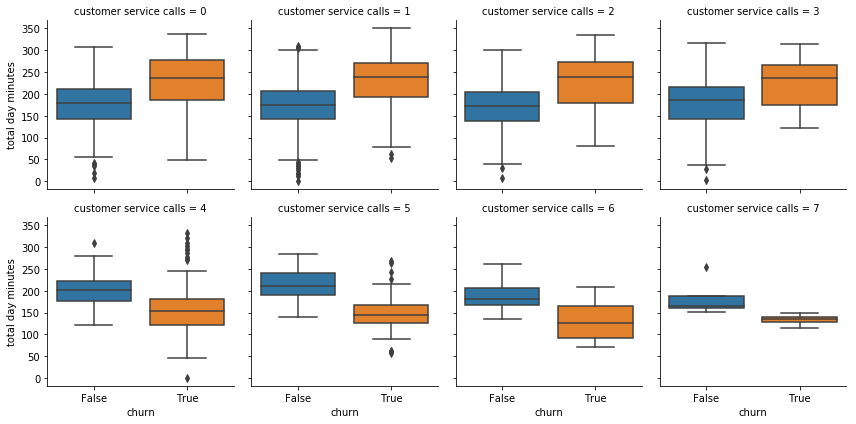

In [63]:
sns.catplot(x = "churn", y = "total day minutes", col = "customer service calls", data = df[df["customer service calls"] < 8], 
           kind = "box", col_wrap = 4, height = 3, aspect = 1)

In [64]:
#se puede ver que sobre 4 llamados los churn no son relevantes. Quiza tiene problemas y dejan de hablar tanto como el grupo de 0 a 4

In [66]:
#CATEGORICAL VS CATEGORICALS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64


In [75]:
#we saw the relevance of customer service calls. We will see it graphycally against churn usin countplot


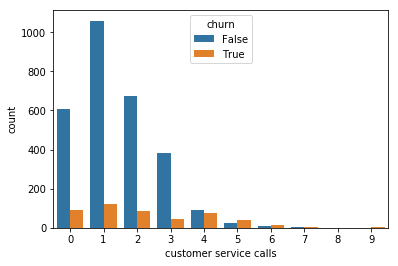

In [76]:
sns.countplot(x = "customer service calls", hue = "churn", data = df)

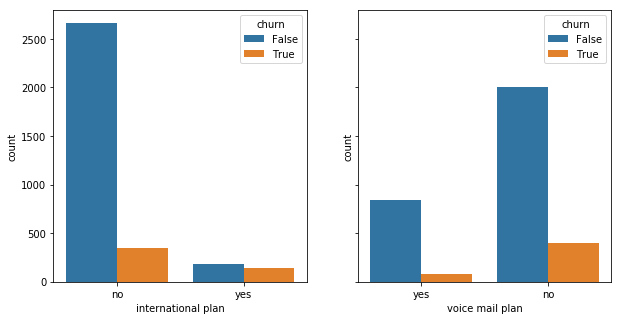

In [81]:
#veamos la comparacion con voice plan y el intl plan
#canvas
_, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (10,5))
sns.countplot(x = "international plan", hue = "churn", data = df, ax = axes[0])
sns.countplot(x = "voice mail plan", hue = "churn", data = df, ax = axes[1])

In [82]:
#se ve que la relacion yes churn/no churn  es mayor para los que tienen intl plan

In [83]:
#uso de tablas de contingencia: crosstab
#veampos churn por estado
pd.crosstab(df["churn"], df["state"])

state  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL ...  OK  OR  \
churn                                                             ...           
False  49  72  44  60  25  57  62  49  52  55  46  50  41  64  53 ...  52  67   
True    3   8  11   4   9   9  12   5   9   8   8   3   3   9   5 ...   9  11   

state  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY  
churn                                                      
False  37  59  46  52  48  54  62  72  65  52  71  96  68  
True    8   6  14   8   5  18  10   5   8  14   7  10   9  

[2 rows x 51 columns]

In [87]:
#veamos el promedio de churn por estado
df.groupby(["state"]).churn.agg([np.mean]).sort_values(by = "mean", ascending = False).T

state        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

state        NV        WA        ME        MT   AR        KS        NY  \
mean   0.212121  0.212121  0.209677  0.205882  0.2  0.185714  0.180723   

state        MN    ...           NM        ND       WV       TN        DC  \
mean   0.178571    ...     0.096774  0.096774  0.09434  0.09434  0.092593   

state        RI        WI        IL        NE        LA        IA        VA  \
mean   0.092308  0.089744  0.086207  0.081967  0.078431  0.068182  0.064935   

state      AZ        AK        HI  
mean   0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [93]:
#WHOLE DATASET VISUALIZATION

In [94]:
#DIMENSIONALOITY REDUCTION WITH TSNE

In [95]:
#importing the clases

In [97]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [101]:
#we leave out churn and state
X = df.drop(["churn", "state"], axis = 1)
#convertimos los yes/no de inlt plan y voice en 1 y 0 usando map
X["international plan"] = X["international plan"].map({"yes": 1, "no":0})
X["voice mail plan"] = X["voice mail plan"].map({"yes": 1, "no":0})

In [103]:
#we need to normalize the data substracting the mean  and dividing it by std. we use StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)